<a href="https://colab.research.google.com/github/GWC-VT/neural-net-workshop/blob/main/IntroNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt #allows us to plot our results if desired


# GWC@VT: Intro to Neural Networks
In this notebook, we'll explore neural networks for a classification machine learning problem, using the famous Iris dataset.

## Data Preparation

In [2]:
#with sklearn datasets, we can go ahead and import the data
#as a label (3 iris classes) and features (4 features)
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
#next, we'll need to one-hot encode our label, since we're working with categorial data
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

Now that our data is ready, let's split it into our training and test data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42, stratify=y)


In [13]:
#let's also scale our X features.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_val)


## Constructing our Model
Now it's time to start building the pieces of our model! Unlike some of the simpler models, we'll actually build the model, its layers, and its optimization and loss functions separately, then compile them together.

In [10]:
model = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)), #4 input features
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [11]:
#compile all our features together!
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


## Training our Model
Now, we can train the model with model.fit

In [18]:
num_epochs = 10

In [19]:
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7756 - loss: 0.6695 - val_accuracy: 0.3333 - val_loss: 2.3417
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7946 - loss: 0.6159 - val_accuracy: 0.3333 - val_loss: 2.3602
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7854 - loss: 0.6002 - val_accuracy: 0.3333 - val_loss: 2.3760
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7740 - loss: 0.5912 - val_accuracy: 0.3333 - val_loss: 2.3838
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8010 - loss: 0.5321 - val_accuracy: 0.3333 - val_loss: 2.3937
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8117 - loss: 0.5455 - val_accuracy: 0.3333 - val_loss: 2.3965
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8006 - loss: 0.5407 - val_accuracy: 0.3333 - val_loss: 2.4067
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7996 - loss: 0.5079 - val_accuracy: 0.3333 - val_loss: 2.4085


# Evaluating our Model
Now, let's see how our model did!

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3333 - loss: 2.4184
Validation Accuracy: 0.3333


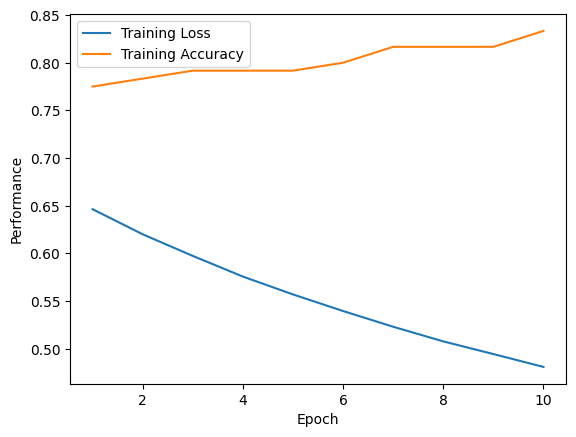

In [23]:
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()